## GRIP : The Sparks Foundation
### Data Science and Business Analytics Internship
### Name : ESLAVATH VINOD KUMAR
### Task 1 : Prediction Using Supervised ML

#### Objective: In this task we will predict the percentage score of a student based on the number of study hours using Supervised Machine Learning and Simple Linear Regression.

In [1]:
#Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
#Reading the data from web
df = pd.read_csv("http://bit.ly/w-data")
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [6]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [7]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [8]:
# To find the no. of rows and columns
df.shape

(25, 2)

In [9]:
# inforomation of data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [10]:
# describe the data set
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [11]:
#To check the null or missing value if any
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

Note : No missing values in this data set

### Data visualization

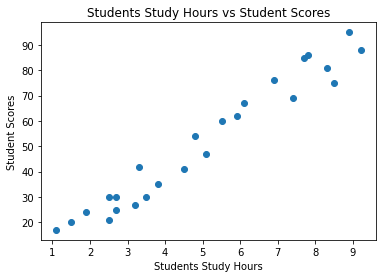

In [12]:
#Plotting the distribution of Student scores
plt.scatter(x = df.Hours, y = df.Scores)
plt.xlabel("Students Study Hours")
plt.ylabel("Student Scores")
plt.title("Students Study Hours vs Student Scores")
plt.show()

#### Observation : 
From this scatter plot, we can clearly observe that student scores increses as the student study hours increase.

Hence, there is positive linear relation between the variables "Students Study Hours" and "Student Scores"

So, we can apply Linear Regression Model.

### Splitting the data set into training and testing data set 

In [25]:
x = df.drop("Scores", axis = "columns")
y = df.drop("Hours", axis = "columns")
print("shape of x = ", x.shape)
print("shape of y = ", y.shape)

shape of x =  (25, 1)
shape of y =  (25, 1)


In [26]:
# Splitting the dataset into training and testing data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=51)

In [27]:
print("shape of x_train = ", x_train.shape)
print("shape of x_test = ", x_test.shape)
print("shape of y_train = ", y_train.shape)
print("shape of y_test = ", y_test.shape)

shape of x_train =  (20, 1)
shape of x_test =  (5, 1)
shape of y_train =  (20, 1)
shape of y_test =  (5, 1)


### Training the algoithm

In [28]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [29]:
lr.coef_

array([[9.56433743]])

In [30]:
lr.intercept_

array([2.70197068])

In [31]:
#Plotting the regression line
line = lr.coef_*x + lr.intercept_

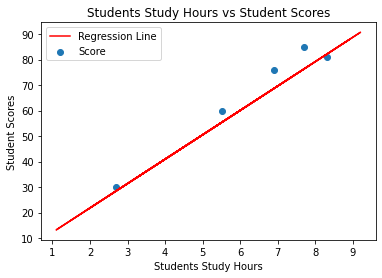

In [32]:
#Plotting the regression line
line = lr.coef_*x + lr.intercept_

#Plotting for the test data
plt.scatter(x_test, y_test, label = "Score")
plt.xlabel("Students Study Hours")
plt.ylabel("Student Scores")
plt.title("Students Study Hours vs Student Scores")
plt.plot(x_train, lr.predict(x_train), color = "red" , label = "Regression Line")
plt.legend()
plt.show()

### Prediction using model

In [33]:
y_pred = lr.predict(x_test)
y_pred

array([[55.30582657],
       [76.34736893],
       [68.69589898],
       [82.08597139],
       [28.52568176]])

In [34]:
# Comparing Actual vs Predicted
pd.DataFrame(np.c_[x_test,y_test,y_pred],columns=["Hours","Actual_Scores","Predicted_Scores"])

,Hours,Actual_Scores,Predicted_Scores
0,5.5,60.0,55.305827
1,7.7,85.0,76.347369
2,6.9,76.0,68.695899
3,8.3,81.0,82.085971
4,2.7,30.0,28.525682


### Comparing Actual vs Predicted

In [22]:
# Comparing Actual vs Predicted
pd.DataFrame(np.c_[x_test,y_test,y_pred],columns=["Hours","Actual_Scores","Predicted_Scores"])

,Hours,Actual_Scores,Predicted_Scores
0,1.5,20.0,16.884145
1,3.2,27.0,33.732261
2,7.4,69.0,75.357018
3,2.5,30.0,26.794801
4,5.9,62.0,60.491033


### Predicting score if a student studies for 9.25 hrs/day

In [35]:
hours = 9.25
pred_score = lr.predict([[9.25]])[0][0].round(2)
print("No of Hours Studied = ", hours)
print("Predicted Score = ", pred_score)

No of Hours Studied =  9.25
Predicted Score =  91.17


### Evaluating the Model

In [36]:
#Checking the Error
from sklearn import metrics
print("Mean Absolute Error : ", metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error :  4.6422390298182545


In [37]:
#Checking the Accuracy
print("lr-Score : ", lr.score(x_test,y_test))

lr-Score :  0.9238518102278777


#### Observation:

After the last step, we can comment that Our Model can give 92.39% accurate results, which is good.

## Conclusion:
### If the student studies for 9.25 hrs/day, then according to our model he/she can score 91.17%
### Thank You :)